# Degree Distribution

In [ ]:
import numpy as np
#Reading data
file1=open('Amazon0601.txt',"r+")
file_read=file1.read()
details2=file_read.split("\n")
details2=details2[4:-1]

In [24]:
final_items=[] #contains 201 source and destination nodes pair
for d in details2:
    temp=[]
    node1,node2=d.split("\t")
    node1=int(node1)
    node2=int(node2)
    if((node1)<=200 and (node2)<=200): #taking 201 nodes for further analysis
        temp.append(int(node1))
        temp.append(int(node2))
        final_items.append(temp)


In [9]:
# creating csv file for 200 nodes
# with open('amazon_final_items.csv', 'w', newline='') as file:
#     writer = csv.writer(file, delimiter=',')
#     writer.writerows(final_items)

In [10]:
import pandas as pd
import csv
source_list,dest_list=[],[]
#opening csv file containing 300 pairs of source and destination nodes and appending them in source and destination list
with open('amazon_final_items.csv', 'r') as file: 
    reader = csv.reader(file)
    for row in reader:
        source_list.append(int(row[0]))
        dest_list.append(int(row[1]))

In [11]:
#getting unique source and destination ids
unique_source_list=list(np.unique(np.array(source_list)))

unique_dest_list=list(np.unique(np.array(dest_list)))

As the given node ids are not in sequential form, I have created a mapping of nodes which gives index to each of the nodes.

In [13]:
nodes_mapping={}
k=0

#giving indices or ids to all the nodes because the nodes are not present in sequential order
for i in unique_source_list:
    nodes_mapping[i]=k
    k+=1

for j in unique_dest_list:
    if j not in unique_source_list:
        nodes_mapping[j]=k
        k+=1
print("total nodes: ", len(nodes_mapping)-1)
print("Total edges: ",len(dest_list))

total nodes:  200
Total edges:  1415


Creation of Adjacency Matrix. Each cell in the adjacency matrix contains 1 where and edge is present between two nodes. 

In [14]:
nodes=len(nodes_mapping)
edge_list=[]
 # creation of adjacency matrix       
adjacency_matrix=np.zeros((nodes,nodes))

for id1,id2 in zip(source_list,dest_list): 
    id1_map=nodes_mapping[id1]
    id2_map=nodes_mapping[id2]
    edge_list.append((id1_map,id2_map))
    adjacency_matrix[id1_map][id2_map]=1
    adjacency_matrix[id2_map][id1_map]=1

In [15]:
total_edges=(200*201)/2
print("Maximum number of edges in the network: ", total_edges)
print("Total edges present in the network : ",len(source_list))

Maximum number of edges in the network:  20100.0
Total edges present in the network :  1415


Calculating degree of each node and storing it in a dictionary called degree_dict where key represents node id and value represents its respective degree. The degree of node 'n' is calculated by counting all 1s of the nth row. Average degree is calculated by adding all the degrees and dividing it by total number of nodes. Average degree is coming out to be 10.25

In [16]:
degrees=[]
#degree corresponding to each node
degree_dict={}
c=0
for i in adjacency_matrix:
    deg=list(i).count(1)
    degrees.append(deg)
    degree_dict[c]=deg
    c=c+1

print("Average degree of the network is :",sum(degrees)/nodes )

Average degree of the network is : 10.25870646766169


Calculating degree distribution by taking (number of nodes having degree k/ total number of nodes in the network)

In [17]:
degree_distribution1={}
# calculating degree distribution
for degree in degrees:
    if degree not in degree_distribution1.keys():
        prob=degrees.count(degree)/nodes
        degree_distribution1[degree]=prob

print("Maximum degree is: ",max(degrees))
print("Minimum degree is: ",min(degrees))

Maximum degree is:  48
Minimum degree is:  1


Plotting Degree distribution. In X-axis we have degrees and in Y-axis we have P(degree)=(number of nodes having degree k/ total number of nodes in the network)

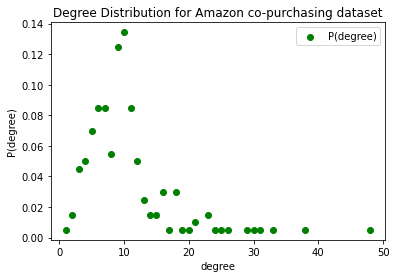

In [18]:
import matplotlib.pyplot as plt
plot_x=list(degree_distribution1.keys())
plot_y=list(degree_distribution1.values())

indexes=np.argsort(plot_x)
x,y=[],[]

for index in indexes:
    x.append(plot_x[index])
    y.append(plot_y[index])

plt.figure()
plt.title("Degree Distribution for Amazon co-purchasing dataset")
plt.xlabel("degree")
plt.ylabel("P(degree)")
plt.scatter(x, y,c='green',label='P(degree)')
plt.legend()
plt.show()

Average degree of the network is : 14.805970149253731
Maximum degree is:  36
Minimum degree is:  0


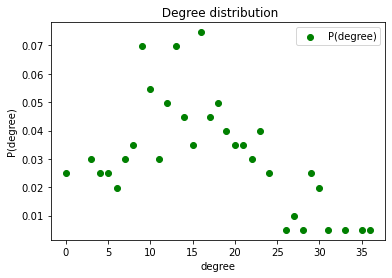

Average degree of the network is : 14.009950248756219
Maximum degree is:  34
Minimum degree is:  0


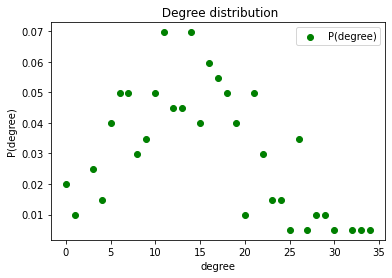

Average degree of the network is : 13.532338308457712
Maximum degree is:  33
Minimum degree is:  0


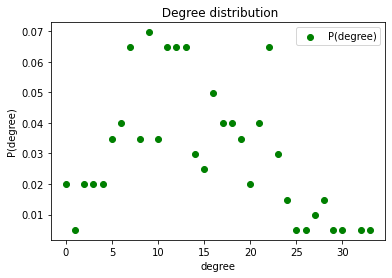

Average degree of the network is : 14.706467661691542
Maximum degree is:  44
Minimum degree is:  0


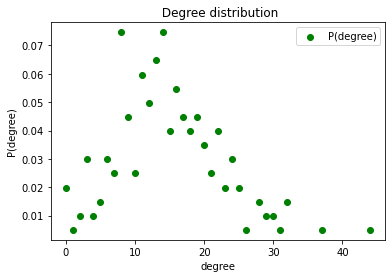

Average degree of the network is : 15.900497512437811
Maximum degree is:  43
Minimum degree is:  0


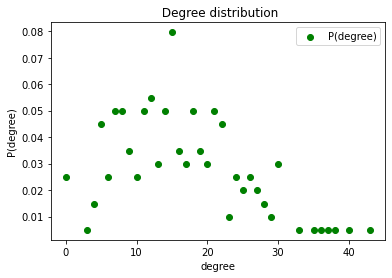

Average degree of the network is : 13.064676616915422
Maximum degree is:  32
Minimum degree is:  0


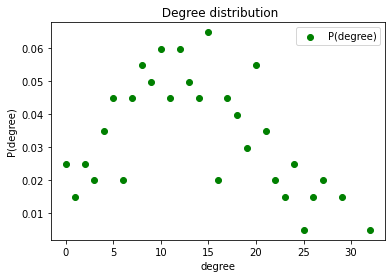

Average degree of the network is : 15.293532338308458
Maximum degree is:  40
Minimum degree is:  0


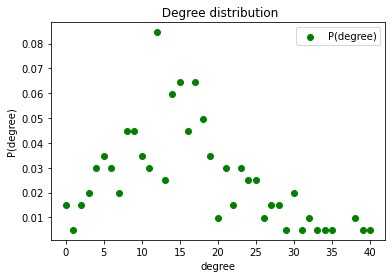

Average degree of the network is : 15.064676616915422
Maximum degree is:  41
Minimum degree is:  0


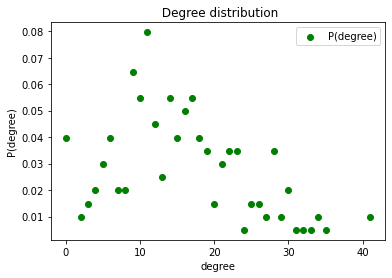

Average degree of the network is : 14.786069651741293
Maximum degree is:  41
Minimum degree is:  0


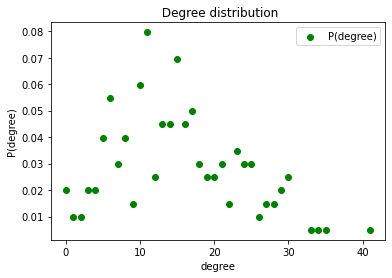

Average degree of the network is : 13.164179104477611
Maximum degree is:  40
Minimum degree is:  0


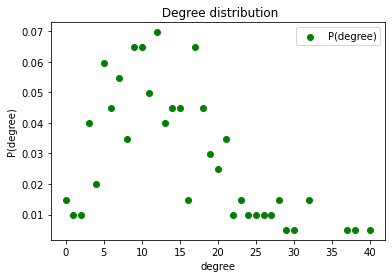

In [19]:
import random
import matplotlib.pyplot as plt
#creating random network
final_degree_list=[]
for i in range(10):
    carts=[]
    adjacency_matrix_random=np.zeros((nodes,nodes)) #creating adjacency matrix
    for j in range(200):
        jth_cart=[]
        for item in nodes_mapping:
            random_val=random.uniform(0,1)
            if random_val< 0.02:
                jth_cart.append(nodes_mapping[item])
        carts.append(jth_cart)
    for cart in carts:
        for c in range(len(cart)):
            for d in range(c+1,len(cart)):
                adjacency_matrix_random[cart[c]][cart[d]]=1
                adjacency_matrix_random[cart[d]][cart[c]]=1
    degrees1=[]
#degree corresponding to each node
    degree_dict1={} 
    c=0
    for i in adjacency_matrix_random:
        deg1=list(i).count(1)
        degrees1.append(deg1)
        degree_dict1[c]=deg1
        c=c+1
    print("Average degree of the network is :",sum(degrees1)/nodes )
    degree_distribution11={} #computing degree distribution
    for degree in degrees1:
        if degree not in degree_distribution11.keys():
            prob=degrees1.count(degree)/nodes
            degree_distribution11[degree]=prob
    print("Maximum degree is: ",max(degrees1))
    print("Minimum degree is: ",min(degrees1))
    
    plot_x=list(degree_distribution11.keys())
    plot_y=list(degree_distribution11.values())
    final_degree_list.append(degree_distribution11)
    indexes=np.argsort(plot_x)
    x,y=[],[]

    for index in indexes:
        x.append(plot_x[index])
        y.append(plot_y[index])
    plt.figure()
    plt.title(" Degree distribution")
    plt.xlabel("degree")
    plt.ylabel("P(degree)")
    plt.scatter(x, y,c='green',label='P(degree)')
    plt.legend()
    plt.show()

In [25]:
scaled_mean_degree={} #computing mean degrees
for i in range(0,51):
    temp=[]
    for dict1 in final_degree_list:
        if i in dict1:
            temp.append(dict1[i])
    if len(temp)!=0:
        scaled_mean_degree[i]=np.mean(temp)
    else:
        scaled_mean_degree[i]=0

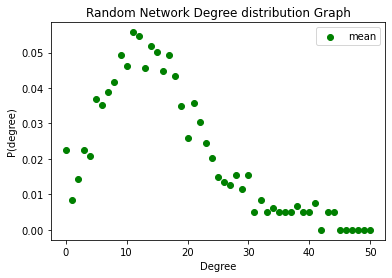

In [23]:
x=[]
for i in range(0,51):
    x.append(i)
xval = scaled_mean_degree.values()
plt.scatter(x, scaled_mean_degree.values(),c='green',label='mean')
plt.title("Random Network Degree distribution Graph")
plt.xlabel("Degree")
plt.ylabel("P(degree)")
plt.legend()
plt.show() 